<a href="https://colab.research.google.com/github/npnavas/MAT_421/blob/main/MAT_421_HWIII.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 17.4 Lagrange Polynomial Interpolation
While the cubic spline method used a collection of piecewise cubic polynomials the method of Lagrange polynomial interpolation uses a single polynomial function. For instance if we have $n$ data points we'll get a polynomial of degree $n-1$. Here the polynomial $L(x)$ is constructed in the following manner,$$L(x) = \sum_{i = 1}^n\left[y_i\left(\prod_{j=1,\ j\neq i}^n\frac{x-x_j}{x_i-x_j}\right)\right].$$
Using our data set from the pervious section 
$$(0,0),(1,1),(2,0),(3,-3),(4,0),(5,5).$$
We can use the ```lagrange(x, y)``` function from the scipy library to construct our polynomial and find $y^\star$ at $x^\star = \frac{9}{2}$. 

y-star:  3.515625000000036


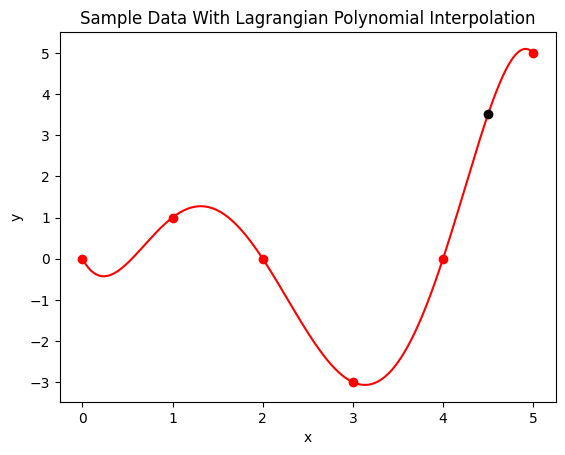

In [5]:
from scipy.interpolate import lagrange
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')

x_data = np.arange(0,6)
y_data = np.array([0,1,0,-3,0,5])
f = lagrange(x_data,y_data)
xstar = 9/2
ystar = f(xstar)
print("y-star: ",ystar)
x = np.linspace(0, 5, 500)
y = f(x)
plt.plot(x_data,y_data,'ro',x,y,"r",xstar,ystar,'ko') 
plt.title('Sample Data With Lagrangian Polynomial Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Comparing this to our exact function we can see the following,

y-star:  3.515625000000036


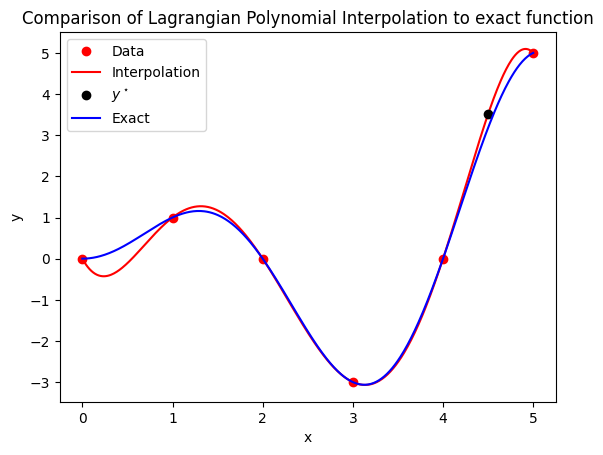

In [11]:
from scipy.interpolate import lagrange
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')

x_data = np.arange(0,6)
y_data = np.array([0,1,0,-3,0,5])
f = lagrange(x_data,y_data)
xstar = 9/2
ystar = f(xstar)
print("y-star: ",ystar)
x = np.linspace(0, 5, 500)
y = f(x)
y_exact = x*np.sin(x*np.pi/2)
plt.plot(x_data,y_data,'ro',x,y,"r",xstar,ystar,'ko',x,y_exact,'b') 
plt.title('Comparison of Lagrangian Polynomial Interpolation to exact function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(["Data", "Interpolation", r'$y^\star$',"Exact"], loc ="best")
plt.show()

# 17.5 Newton's Polynomial Interpolation
Our final method of interpolation the Newton polynomial interpolation method. Here we can consider the following polynomial to fit to the data exactly
$$f(x) = a_0 + a_1(x-x_0)+a_2(x-x_0)(x-x_1)=\cdots +a_{n}(x-x_0)(x-x_1)\cdots(x-x_{n}).$$

We can rewrite this as
$$f(x) = \sum_{i=0}^n \left[a_i \left(\prod_{j=0}^{i-1}(x-x_j)\right)\right].$$

Here we can clearly see that $a_0 = y_0.$ To construct $a_1$ we can use 
$$f(x_1) = y_0 + a_1(x_1-x_0) = y_1.$$
Rearranging this we get
$$a_1 = \frac{y_1-y_0}{x_1-x_0}.$$ 
We can continue this process to solve the rest of the $a_i$ values. 

Here we'll use some of the code the textbook wrote in order to solve for these values and plot the polynomial   

3.515625


Text(0.5, 1.0, "Newton's Polynomial Interpolation")

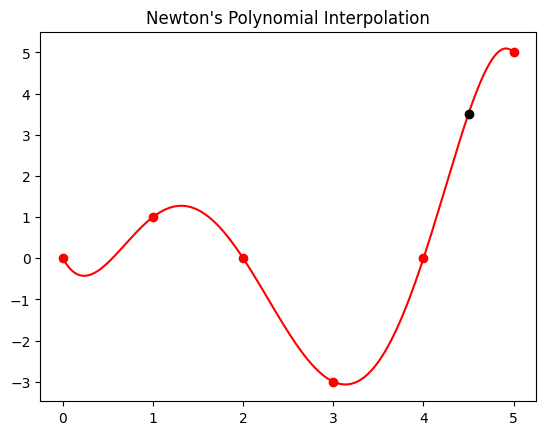

In [27]:
def divided_diff(x, y):
    '''
    function to calculate the divided
    differences table
    '''
    n = len(y)
    coef = np.zeros([n, n])
    # the first column is y
    coef[:,0] = y
    
    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
           (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
            
    return coef

def newton_poly(coef, x_data, x):
    '''
    evaluate the newton polynomial 
    at x
    '''
    n = len(x_data) - 1 
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p
x_data = np.arange(0,6)
y_data = np.array([0,1,0,-3,0,5])
a_s = divided_diff(x_data, y_data)[0, :]
x_new = np.linspace(0, 5, 500)
y_new = newton_poly(a_s, x_data, x_new)
x_star = 9/2
y_star = newton_poly(a_s,x_data, x_star)
print(y_star)
plt.plot(x_data, y_data, 'ro',x_new, y_new, 'r', x_star, y_star, 'ko')

plt.title("Newton's Polynomial Interpolation")

And again we can show accuarcy by doing the following 

3.515625


Text(0.5, 1.0, "Newton's Polynomial Interpolation Comparison with Exact")

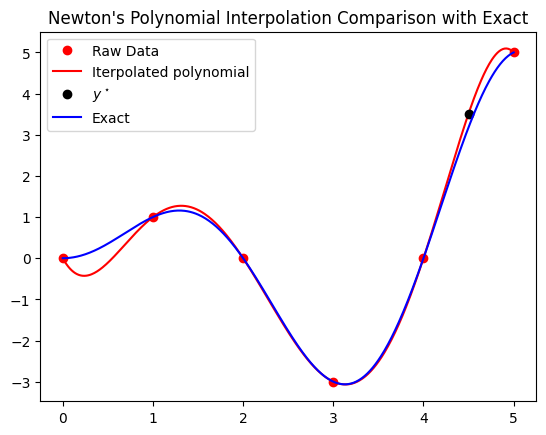

In [28]:
def divided_diff(x, y):
    '''
    function to calculate the divided
    differences table
    '''
    n = len(y)
    coef = np.zeros([n, n])
    # the first column is y
    coef[:,0] = y
    
    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
           (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
            
    return coef

def newton_poly(coef, x_data, x):
    '''
    evaluate the newton polynomial 
    at x
    '''
    n = len(x_data) - 1 
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p
x_data = np.arange(0,6)
y_data = np.array([0,1,0,-3,0,5])
a_s = divided_diff(x_data, y_data)[0, :]
x_new = np.linspace(0, 5, 500)
y_new = newton_poly(a_s, x_data, x_new)
x_star = 9/2
y_star = newton_poly(a_s,x_data, x_star)
print(y_star)
x = np.linspace(0, 5, 500)
y_exact = x*np.sin(x*np.pi/2)
plt.plot(x_data, y_data, 'ro',x_new, y_new, 'r', x_star, y_star, 'ko', x,y_exact, "b")
plt.legend(["Raw Data", "Iterpolated polynomial", r"$y^\star$", "Exact"], loc = "best")
plt.title("Newton's Polynomial Interpolation Comparison with Exact")